# 예제2 임베딩성능측정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='Greys')
import rpy2 
%load_ext rpy2.ipython
%run pybase
%run heavysnow 

In [3]:
### Example 2
np.random.seed(777)
import math
pi=math.pi
n=60
ang=np.linspace(-pi,pi-2*pi/n,n)
V=np.arange(n)+1
r=1
vx=r*np.cos(ang)
vy=r*np.sin(ang)
fmean=vx*0+1
#fmean[vy<0]=3
#fmean[vy>=0]= -3

In [4]:
snrs= np.array([5,10,15,20,25,30])

In [5]:
stds = 1 / snrs
stds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
bs= [0.05, 0.1, 0.5] 

In [6]:
f=[fmean + np.random.randn(60)*stds[i] for i in range(10)] 

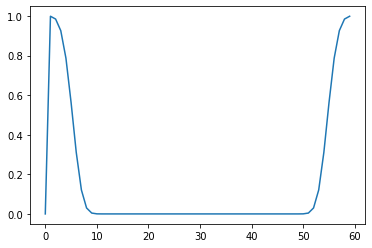

In [7]:
# Edg setting
Σ=l2distance(np.matrix([vx,vy]).T)
θ=0.25
W=np.exp(-Σ**2/(2*θ**2))-np.eye(n,n)
E=W>0
plt.plot(W[0,:].T)
# color
import matplotlib.cm as cm
col=list(np.array(cm.rainbow((ang+pi)/2/pi)))

In [10]:
I=10 # noise level 
J=3 # bs 
K=100 # iter

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [8]:
gs=[[GraphSignal(V,W,fmean + np.random.randn(60)*stds[i]) for i in range(10)] for k in range(100)] 

In [29]:
hs=[[HeavysnowTransform(gs[k][i]) for i in range(I)] for k in range(K)] 

In [31]:
dists = np.zeros([I,J,K,60,2]) 
for i in range(I): # i=noise_level, j=b, k=iter, 
    for j in range(J):
        for k in range(K):
            hs[k][i].snow(tau=100000,b=bs[j]) 
            dists[i,j,k,:,:] = pca.fit(hs[k][i].snowdistance).transform(hs[k][i].snowdistance) 
        print(str(i)+','+str(j))

0,0
0,1
0,2
1,0
1,1
1,2
2,0
2,1
2,2
3,0
3,1
3,2
4,0
4,1
4,2
5,0
5,1
5,2
6,0
6,1
6,2
7,0
7,1
7,2
8,0
8,1
8,2
9,0
9,1
9,2


In [32]:
dists.shape

(10, 3, 100, 60, 2)

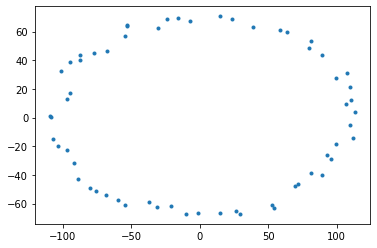

In [33]:
plt.plot(dists[0,-2,-1,:,:][:,0],dists[0,-2,-1,:,:][:,1],'.')

In [34]:
dists_stds = np.zeros([I,J,K])
for i in range(I):
    for j in range(J):
        for k in range(K):
            dists_stds[i,j,k]=np.std(np.sqrt((dists[i,j,k,...]**2).sum(axis=-1))/np.mean(np.sqrt((dists[i,j,k,...]**2).sum(axis=-1)))*9)

In [35]:
dists_stds

array([[[0.61517741, 1.22923445, 0.98873536, ..., 1.00694884,
         0.91336061, 1.07562174],
        [1.06567876, 0.90265391, 0.98904638, ..., 0.89307949,
         0.83881112, 1.45435043],
        [0.75444303, 0.7954398 , 0.84647501, ..., 1.01741042,
         1.0790329 , 1.33487337]],

       [[0.4866689 , 0.98133635, 0.79209552, ..., 0.7830513 ,
         0.9988982 , 0.75573039],
        [0.68716658, 1.20046307, 0.68621021, ..., 0.84142021,
         0.43989608, 0.50761925],
        [0.82614184, 1.5531921 , 0.99814786, ..., 1.02010174,
         0.75085306, 1.29259211]],

       [[0.9643349 , 1.14035754, 0.90967937, ..., 0.79786701,
         1.0184768 , 0.74879311],
        [0.68383878, 0.78658989, 0.57842878, ..., 1.26950477,
         1.4120686 , 0.58947428],
        [1.39862745, 1.04842819, 0.87490072, ..., 0.97788069,
         1.17128558, 0.9857536 ]],

       ...,

       [[5.76543253, 4.48993187, 4.81324596, ..., 7.33911354,
         4.41765721, 7.13050433],
        [1.18398394, 

In [36]:
dists_stds.mean(axis=-1)

array([[0.97068626, 0.90377011, 0.91099634],
       [0.88282443, 0.91802767, 0.9312816 ],
       [0.96458785, 0.9071536 , 0.91300746],
       [1.10041445, 0.89568394, 0.94734727],
       [1.77820614, 0.89690819, 0.95889456],
       [3.19719672, 0.9463845 , 0.94363317],
       [4.68124141, 0.96175326, 0.95142872],
       [5.84643839, 1.09283849, 0.95388463],
       [6.36369079, 1.34267409, 0.87329048],
       [6.40575939, 1.74837802, 0.91549259]])

In [39]:
df=pd.DataFrame(dists_stds.mean(axis=-1))
df

,0,1,2
0,0.970686,0.903770,0.910996
1,0.882824,0.918028,0.931282
2,0.964588,0.907154,0.913007
3,1.100414,0.895684,0.947347
4,1.778206,0.896908,0.958895
5,3.197197,0.946385,0.943633
6,4.681241,0.961753,0.951429
7,5.846438,1.092838,0.953885
8,6.363691,1.342674,0.873290
9,6.405759,1.748378,0.915493


In [49]:
df.columns= ['b=0.05','b=0.1','b=0.5']
df.index= ['sd='+str(i) for i in stds]
df

,b=0.05,b=0.1,b=0.5
sd=0.1,0.970686,0.903770,0.910996
sd=0.2,0.882824,0.918028,0.931282
sd=0.3,0.964588,0.907154,0.913007
sd=0.4,1.100414,0.895684,0.947347
sd=0.5,1.778206,0.896908,0.958895
sd=0.6,3.197197,0.946385,0.943633
sd=0.7,4.681241,0.961753,0.951429
sd=0.8,5.846438,1.092838,0.953885
sd=0.9,6.363691,1.342674,0.873290
sd=1,6.405759,1.748378,0.915493


In [51]:
df.to_csv('Embeddingperformance_tau10.csv')

`-` $\tau=150,000$

In [ ]:
gs=[[GraphSignal(V,W,fmean + np.random.randn(60)*stds[i]) for i in range(10)] for k in range(100)] 
hs=[[HeavysnowTransform(gs[k][i]) for i in range(I)] for k in range(K)] 
dists2 = np.zeros([I,J,K,60,2]) 
for i in range(I): # i=noise_level, j=b, k=iter, 
    for j in range(J):
        for k in range(K):
            hs[k][i].snow(tau=150000,b=bs[j]) 
            dists2[i,j,k,:,:] = pca.fit(hs[k][i].snowdistance).transform(hs[k][i].snowdistance) 
        print(str(i)+','+str(j))
dists_stds2 = np.zeros([I,J,K])
for i in range(I):
    for j in range(J):
        for k in range(K):
            dists_stds2[i,j,k]=np.std(np.sqrt((dists2[i,j,k,...]**2).sum(axis=-1))/np.mean(np.sqrt((dists2[i,j,k,...]**2).sum(axis=-1)))*9)        
dists_stds2.mean(axis=-1)        

0,0
9,0


In [ ]:
df2=pd.DataFrame(dists_stds2.mean(axis=-1))
df2.columns= ['b=0.05','b=0.1','b=0.5']
df2.index= ['sd='+str(i) for i in stds]
df2.to_csv('Embeddingperformance_tau15.csv')

`-` $\tau=200,000$

In [ ]:
gs=[[GraphSignal(V,W,fmean + np.random.randn(60)*stds[i]) for i in range(10)] for k in range(100)] 
hs=[[HeavysnowTransform(gs[k][i]) for i in range(I)] for k in range(K)] 
dists3 = np.zeros([I,J,K,60,2]) 
for i in range(I): # i=noise_level, j=b, k=iter, 
    for j in range(J):
        for k in range(K):
            hs[k][i].snow(tau=200000,b=bs[j]) 
            dists3[i,j,k,:,:] = pca.fit(hs[k][i].snowdistance).transform(hs[k][i].snowdistance) 
        print(str(i)+','+str(j))
dists_stds3 = np.zeros([I,J,K])
for i in range(I):
    for j in range(J):
        for k in range(K):
            dists_stds3[i,j,k]=np.std(np.sqrt((dists3[i,j,k,...]**2).sum(axis=-1))/np.mean(np.sqrt((dists3[i,j,k,...]**2).sum(axis=-1)))*9)        
dists_stds3.mean(axis=-1)        

In [ ]:
df3=pd.DataFrame(dists_stds3.mean(axis=-1))
df3.columns= ['b=0.05','b=0.1','b=0.5']
df3.index= ['sd='+str(i) for i in stds]
df3.to_csv('Embeddingperformance_tau20.csv')